#### 0. Exploring the data

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")


In [112]:
RANDOM_STATE = 42
df = pd.read_csv("./datasource/accident_2022.csv")

In [113]:
df.describe()

,CASENUM,PSU,PSU_VAR,PSUSTRAT,REGION,URBANICITY,STRATUM,PJ,WEIGHT,PEDS,...,WEATHER,WEATHR_IM,SCH_BUS,INT_HWY,MAX_SEV,MAXSEV_IM,NUM_INJ,NO_INJ_IM,ALCOHOL,ALCHL_IM
count,5.395500e+04,53955.000000,53955.000000,53955.000000,53955.000000,53955.000000,53955.000000,53955.000000,53955.000000,53955.000000,...,53955.000000,53955.000000,53955.000000,53955.000000,53955.000000,53955.000000,53955.000000,53955.000000,53955.000000,53955.00000
mean,2.022043e+11,48.251469,50.984784,12.431508,2.719563,1.243369,7.217570,2373.481234,109.915598,0.096747,...,5.333667,2.360152,0.005375,0.097044,1.121286,0.977537,2.554629,0.747289,4.732685,1.92794
std,2.675263e+05,19.996177,29.120100,6.155197,0.877424,0.429120,2.591102,1677.740590,65.879439,0.311848,...,16.883464,3.059557,0.073117,0.304903,1.574404,1.164642,13.258251,0.970859,3.473328,0.25859
min,2.022037e+11,10.000000,10.000000,1.000000,1.000000,1.000000,2.000000,45.000000,8.770366,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000
25%,2.022040e+11,32.000000,32.000000,8.000000,2.000000,1.000000,6.000000,573.000000,47.501682,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.00000
50%,2.022043e+11,48.000000,48.000000,12.000000,3.000000,1.000000,8.000000,1800.000000,121.498316,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.00000
75%,2.022045e+11,65.000000,67.000000,16.000000,3.000000,1.000000,9.000000,4142.000000,145.062232,0.000000,...,2.000000,1.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,9.000000,2.00000
max,2.022048e+11,83.000000,214.000000,25.000000,4.000000,2.000000,10.000000,4154.000000,520.822735,5.000000,...,99.000000,12.000000,1.000000,9.000000,9.000000,8.000000,99.000000,14.000000,9.000000,2.00000


In [114]:
df.columns

Index(['CASENUM', 'PSU', 'PSU_VAR', 'PSUSTRAT', 'REGION', 'REGIONNAME',
       'URBANICITY', 'URBANICITYNAME', 'STRATUM', 'STRATUMNAME', 'PJ',
       'WEIGHT', 'PEDS', 'PERNOTMVIT', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL',
       'PERMVIT', 'MONTH', 'MONTHNAME', 'DAY_WEEK', 'DAY_WEEKNAME', 'WKDY_IM',
       'WKDY_IMNAME', 'YEAR', 'YEARNAME', 'HOUR', 'HOURNAME', 'HOUR_IM',
       'HOUR_IMNAME', 'MINUTE', 'MINUTENAME', 'MINUTE_IM', 'MINUTE_IMNAME',
       'HARM_EV', 'HARM_EVNAME', 'EVENT1_IM', 'EVENT1_IMNAME', 'MAN_COLL',
       'MAN_COLLNAME', 'MANCOL_IM', 'MANCOL_IMNAME', 'RELJCT1', 'RELJCT1NAME',
       'RELJCT1_IM', 'RELJCT1_IMNAME', 'RELJCT2', 'RELJCT2NAME', 'RELJCT2_IM',
       'RELJCT2_IMNAME', 'TYP_INT', 'TYP_INTNAME', 'REL_ROAD', 'REL_ROADNAME',
       'WRK_ZONE', 'WRK_ZONENAME', 'LGT_COND', 'LGT_CONDNAME', 'LGTCON_IM',
       'LGTCON_IMNAME', 'WEATHER', 'WEATHERNAME', 'WEATHR_IM', 'WEATHR_IMNAME',
       'SCH_BUS', 'SCH_BUSNAME', 'INT_HWY', 'INT_HWYNAME', 'MAX_SEV',
       'MAX_SEVN

In [115]:
#dropping identifier columns
columns_to_keep = [
    'MONTH', 'DAY_WEEK', 'HOUR',
    'HARM_EV', 'MAN_COLL', 'RELJCT1', 'RELJCT2',
    'TYP_INT', 'REL_ROAD', 'WRK_ZONE',
    'LGT_COND', 'WEATHER', 'SCH_BUS', 'INT_HWY', 'ALCOHOL', 'MAX_SEV'
]
df = df[columns_to_keep]

In [116]:
df['MAX_SEV'].value_counts(normalize=True)

MAX_SEV
0    0.481160
1    0.206061
2    0.161301
3    0.107238
4    0.023798
9    0.018071
5    0.001928
8    0.000389
6    0.000056
Name: proportion, dtype: float64

In [117]:
#dropping unlabeled data
df = df[df['MAX_SEV'] <= 4]
#convert all features into category
for col in df.select_dtypes(include='number'):
    df[col] = df[col].astype('category')
df.describe()

,MONTH,DAY_WEEK,HOUR,HARM_EV,MAN_COLL,RELJCT1,RELJCT2,TYP_INT,REL_ROAD,WRK_ZONE,LGT_COND,WEATHER,SCH_BUS,INT_HWY,ALCOHOL,MAX_SEV
count,52852,52852,52852,52852,52852,52852,52852,52852,52852,52852,52852,52852,52852,52852,52852,52852
unique,12,7,25,55,11,4,15,11,13,5,9,13,2,3,4,5
top,10,6,17,12,0,0,1,1,1,0,1,1,0,0,2,0
freq,4905,8871,4297,35136,17521,48795,21510,28093,42920,51985,35833,39284,52564,47694,29660,25961


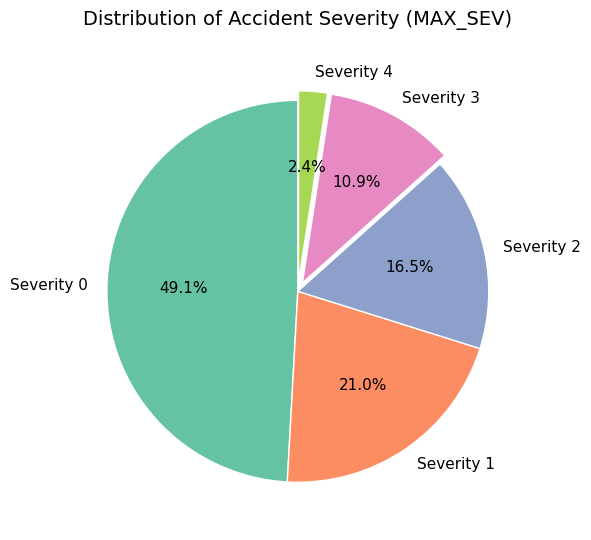

In [118]:
# Prepare data
counts = df['MAX_SEV'].value_counts().sort_index()
labels = [f"Severity {i}" for i in counts.index]

# Use a distinct color palette
colors = sns.color_palette("Set2", n_colors=len(counts))
explode = [0.05 if c < counts.max() * 0.3 else 0 for c in counts]

# Plot
plt.figure(figsize=(6,6))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    colors=colors,
    textprops={'fontsize': 11},
    wedgeprops={'edgecolor':'white', 'linewidth':1}
)
plt.title("Distribution of Accident Severity (MAX_SEV)", fontsize=14, pad=20)
plt.tight_layout()
plt.show()


The dataset is highly imbalanced — if we predict class 0 (no injury) for all data points, we still achieve around 50% accuracy. However, the proportion of serious injury and fatal accidents is extremely low, which causes the model to become biased toward the majority class.

To address this issue, we obtained the Accidents dataset for 2016-2021 from the same source and combined it with the main dataset. This helps increase the representation of high-severity cases, providing a more balanced dataset and improving the model’s ability to detect severe accidents.

In [119]:
#combine 2 data
# === Load additional data ===
df_2020 = pd.read_csv("./datasource/accident_2020.csv")
df_2021 = pd.read_csv("./datasource/accident_2021.csv")
df_2019 = pd.read_csv("./datasource/accident_2019.csv")
df_2018 = pd.read_csv("./datasource/accident_2018.csv")
df_2017 = pd.read_csv("./datasource/accident_2017.csv")
df_2016 = pd.read_csv("./datasource/accident_2016.csv")


df_2016 = df_2016[columns_to_keep]
df_2017 = df_2017[columns_to_keep]
df_2018 = df_2018[columns_to_keep]
df_2019 = df_2019[columns_to_keep]
df_2020 = df_2020[columns_to_keep]
df_2021 = df_2021[columns_to_keep]
df_extra = pd.concat([
    df_2020[df_2020['MAX_SEV'].isin([0,1,2,3,4])],
    df_2021[df_2021['MAX_SEV'].isin([0,1,2,3,4])],
    df_2019[df_2019['MAX_SEV'].isin([0,1,2,3,4])],
    df_2018[df_2018['MAX_SEV'].isin([0,1,2,3,4])],
    df_2017[df_2017['MAX_SEV'].isin([0,1,2,3,4])],
    df_2016[df_2016['MAX_SEV'].isin([1,2,3,4])]
], ignore_index=True)

# === Combine with 2022 dataset ===
df= pd.concat([df, df_extra], ignore_index=True)

# === Drop unlabel data ===
df = df[df['MAX_SEV'] <= 4]
# === Show new distribution ===
print("✅ Combined dataset shape:", df.shape)
print("\nProportion of severity levels:")
print(df['MAX_SEV'].value_counts(normalize=True) * 100)


✅ Combined dataset shape: (337807, 16)

Proportion of severity levels:
MAX_SEV
0    44.905819
1    24.213530
2    17.283242
3    11.352340
4     2.245069
Name: proportion, dtype: float64


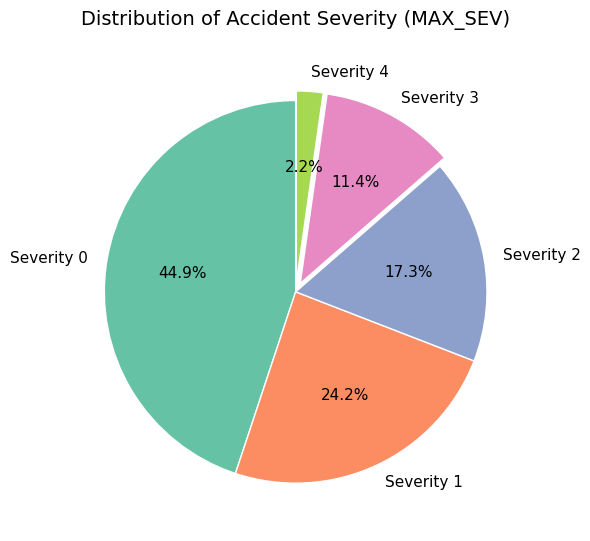

In [120]:
counts = df['MAX_SEV'].value_counts().sort_index()
labels = [f"Severity {i}" for i in counts.index]
colors = sns.color_palette("Set2", n_colors=len(counts))
explode = [0.05 if c < counts.max() * 0.3 else 0 for c in counts]

# Plot
plt.figure(figsize=(6,6))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    colors=colors,
    textprops={'fontsize': 11},
    wedgeprops={'edgecolor':'white', 'linewidth':1}
)
plt.title("Distribution of Accident Severity (MAX_SEV)", fontsize=14, pad=20)
plt.tight_layout()
plt.show()


In [121]:
df.head(5)

,MONTH,DAY_WEEK,HOUR,HARM_EV,MAN_COLL,RELJCT1,RELJCT2,TYP_INT,REL_ROAD,WRK_ZONE,LGT_COND,WEATHER,SCH_BUS,INT_HWY,ALCOHOL,MAX_SEV
0,1,7,9,12,2,0,1,1,1,0,1,2,0,0,9,4
1,1,7,21,42,0,0,1,1,4,0,2,2,0,1,2,2
2,1,1,5,12,1,0,1,1,1,0,3,2,0,0,2,0
3,1,7,22,12,1,0,1,1,1,0,3,2,0,0,9,0
4,1,1,2,24,0,1,19,1,4,0,3,99,0,0,1,1


| **Column**   | **Definition**                                                                                                   |
| ------------ | ------------------------------------------------------------------------------------------------------------------------ |
| **MONTH**    | Month of crash (1 = January, …, 12 = December).                                                                          |
| **DAY_WEEK** | Day of week of crash (1 = Sunday, …, 7 = Saturday).                                                                      |
| **HOUR**     | Hour of crash (0–23, based on 24-hour clock).                                                                            |
| **HARM_EV**  | First harmful event — the first injury-producing event in the crash (e.g., collision with vehicle, object, or overturn). |
| **MAN_COLL** | Manner of collision — how the vehicles collided (e.g., angle, head-on, sideswipe).                                       |
| **RELJCT1**  | Relation to junction — whether the crash occurred at or near an intersection.                                            |
| **RELJCT2**  | Relation to junction detail — secondary relation to specific junction features (e.g., ramp, merge area).                 |
| **TYP_INT**  | Type of intersection (e.g., 4-way, T-intersection, roundabout).                                                          |
| **REL_ROAD** | Relation to roadway — location of crash relative to the roadway (e.g., on road, shoulder, median, roadside).             |
| **WRK_ZONE** | Indicates if the crash occurred in or near a work zone.                                                                  |
| **LGT_COND** | Lighting condition at the time of crash (e.g., daylight, dark-lighted, dark-unlighted).                                  |
| **WEATHER**  | Atmospheric conditions during crash (e.g., clear, rain, snow, fog).                                                      |
| **SCH_BUS**  | School bus involvement (0 = none, 1 = directly involved, 2 = indirectly).                                                |
| **INT_HWY**  | Whether the crash occurred on or was related to an interstate highway.                                                   |
| **ALCOHOL**  | Indicates whether alcohol was a contributing factor (derived from driver or crash data).                                 |
| **MAX_SEV**  | Maximum severity of injury in the crash (0 = no injury, 4 = fatal).                                                      |


In [122]:
#check for missing/unknown value
UNKNOWN_MAP = {
    "HOUR":      {99},
    "WEATHER":   {9},           
    "LGT_COND":  {8, 9},         
    "SCH_BUS":   {9},
    "INT_HWY":   {9},
    "ALCOHOL":   {8,9},
    "MAN_COLL":  {98, 99},      
    "HARM_EV":   {98, 99},
    "RELJCT1":   {8, 9},
    "RELJCT2":   {98, 99},
    "TYP_INT":   {98, 99},
    "REL_ROAD":  {98,99},
    "WRK_ZONE":  {4},
}
rows = []
n = len(df)
for col in df.columns:
    codes = UNKNOWN_MAP.get(col, set())
    if len(codes) == 0:
        unk_count = 0
    else:
        unk_count = df[col].isin(codes).sum()
    rows.append({
        "column": col,
        "unknown_codes": sorted(codes),
        "unknown_count": int(unk_count),
        "unknown_percent": round(100 * unk_count / n, 3) if n else 0.0
    })
unknown_summary = pd.DataFrame(rows).sort_values("unknown_percent", ascending=False)
print(unknown_summary)
df_clean = df.copy()
for col, codes in UNKNOWN_MAP.items():
    if codes:
        df_clean.loc[df_clean[col].isin(codes), col] = np.nan

      column unknown_codes  unknown_count  unknown_percent
14   ALCOHOL        [8, 9]          93794           27.766
5    RELJCT1        [8, 9]          64476           19.087
7    TYP_INT      [98, 99]          28674            8.488
6    RELJCT2      [98, 99]          19135            5.664
9   WRK_ZONE           [4]           2411            0.714
10  LGT_COND        [8, 9]           1643            0.486
2       HOUR          [99]           1214            0.359
4   MAN_COLL      [98, 99]           1061            0.314
3    HARM_EV      [98, 99]            206            0.061
8   REL_ROAD      [98, 99]            160            0.047
13   INT_HWY           [9]             22            0.007
0      MONTH            []              0            0.000
1   DAY_WEEK            []              0            0.000
11   WEATHER           [9]              0            0.000
12   SCH_BUS           [9]              0            0.000
15   MAX_SEV            []              0            0.0

In [123]:
import pandas as pd
import numpy as np

#Drop the ALCOHOL column
df_clean = df_clean.drop(columns=['ALCOHOL'])
#fill REJCT1 NaN with 0
df_clean['RELJCT1'] = df_clean['RELJCT1'].fillna(0)
# Drop rows with any NaN (unknown) values
df_clean = df_clean.dropna()

#Reset index for cleanliness
df_clean = df_clean.reset_index(drop=True)

print(f"After cleaning: {len(df_clean)} rows remaining out of {len(df)}")
df = df_clean


After cleaning: 286803 rows remaining out of 337807


In [124]:
#convert all features into category
for col in df.select_dtypes(include='number'):
    df[col] = df[col].astype('category')

In [125]:
df.describe()

,MONTH,DAY_WEEK,HOUR,HARM_EV,MAN_COLL,RELJCT1,RELJCT2,TYP_INT,REL_ROAD,WRK_ZONE,LGT_COND,WEATHER,SCH_BUS,INT_HWY,MAX_SEV
count,286803,286803,286803.0,286803.0,286803.0,286803.0,286803.0,286803.0,286803.0,286803.0,286803.0,286803.0,286803.0,286803.0,286803
unique,12,7,24.0,54.0,9.0,2.0,13.0,9.0,11.0,4.0,7.0,13.0,2.0,2.0,5
top,10,6,17.0,12.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0
freq,28605,47908,24280.0,190546.0,95450.0,272607.0,124694.0,162291.0,230763.0,283855.0,196299.0,205188.0,285339.0,259485.0,126537


In [126]:
# Drop WRK_ZONE and SCH_BUS columns because of high single value proportion
df = df.drop(columns=['WRK_ZONE', 'SCH_BUS'])


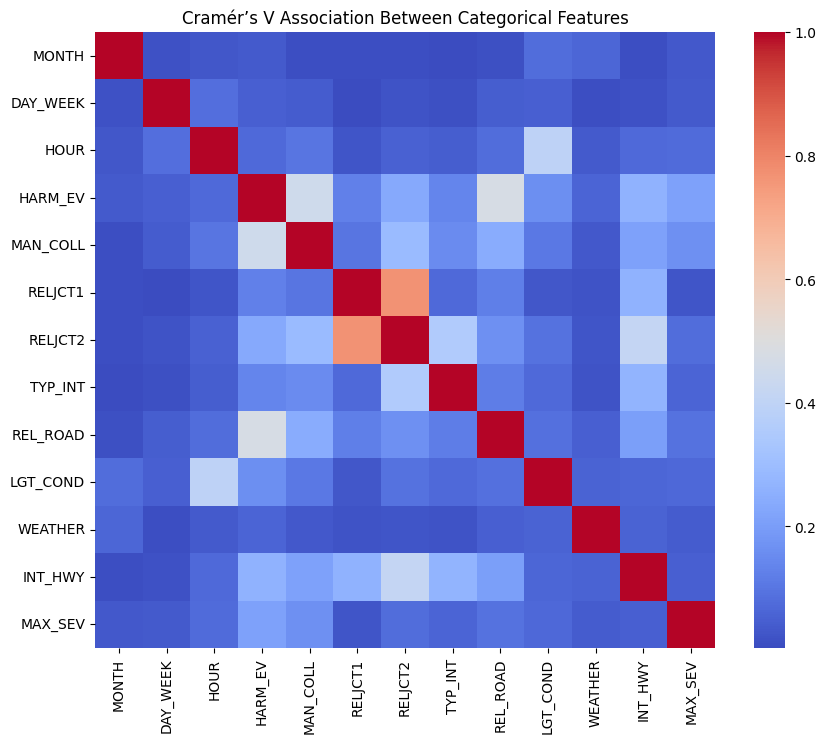

In [127]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

# Compute pairwise Cramér’s V for all categorical features
cat_cols = df.columns
cramers = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 == col2:
            cramers.loc[col1, col2] = 1.0
        else:
            cramers.loc[col1, col2] = cramers_v(df[col1], df[col2])

cramers = cramers.astype(float)

# 🔍 visualize heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(cramers, cmap="coolwarm", annot=False)
plt.title("Cramér’s V Association Between Categorical Features")
plt.show()



In [128]:
#drop high correlated column
df = df.drop(columns='RELJCT1')

In [129]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['MAX_SEV'])
y = df['MAX_SEV']
for col in X.columns:
    X[col] = X[col].astype('category').cat.codes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### 1. Simple model Analysis
This one uses very simple tree, without class weight balance to observe how the tree behaves on very unbalanced dataset

In [130]:
#Very basic Decision Tree model with default parameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Decision Tree Accuracy: 0.4003440220360061
              precision    recall  f1-score   support

           0       0.54      0.64      0.59     37961
           1       0.27      0.25      0.26     20480
           2       0.26      0.21      0.23     15417
           3       0.20      0.15      0.17     10156
           4       0.10      0.08      0.09      2027

    accuracy                           0.40     86041
   macro avg       0.27      0.27      0.27     86041
weighted avg       0.37      0.40      0.38     86041



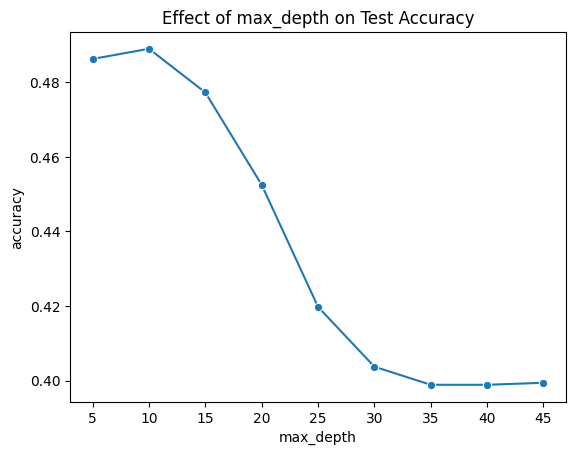

In [131]:
#Hyperparameter tuning: max_depth
depths = range(5, 50, 5)
acc = []
for i in depths:
    dt = DecisionTreeClassifier(max_depth=i, random_state=RANDOM_STATE)
    dt.fit(X_train,y_train)
    acc.append(dt.score(X_test, y_test))
#Plot the trend using seaborn
df_depth = pd.DataFrame({
    "max_depth": depths,
    "accuracy": acc
})
sns.lineplot(data=df_depth, x="max_depth", y="accuracy", marker="o")
plt.title("Effect of max_depth on Test Accuracy")
plt.show()

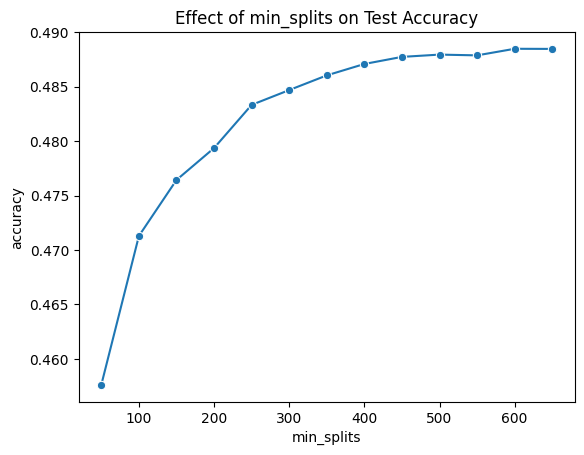

In [132]:
#Hyperparameter tuning: min_samples_split
min_splits = range(50,700,50)
acc2 = []
for i in min_splits:
    dt = DecisionTreeClassifier(max_depth=None,min_samples_split=i, random_state=42)
    dt.fit(X_train,y_train)
    acc2.append(dt.score(X_test, y_test))
#Plot the trend using seaborn
df_split = pd.DataFrame({
    "min_splits": min_splits,
    "accuracy": acc2
})
sns.lineplot(data=df_split, x="min_splits", y="accuracy", marker="o")
plt.title("Effect of min_splits on Test Accuracy")
plt.show()

In [133]:
#Final model after hyperparameter tuning
dt = DecisionTreeClassifier(max_depth=10, min_samples_split= 500, random_state=RANDOM_STATE)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.4907776525144989
              precision    recall  f1-score   support

           0       0.51      0.98      0.67     37961
           1       0.35      0.04      0.07     20480
           2       0.43      0.24      0.31     15417
           3       0.34      0.06      0.10     10156
           4       0.38      0.04      0.07      2027

    accuracy                           0.49     86041
   macro avg       0.40      0.27      0.24     86041
weighted avg       0.43      0.49      0.38     86041



     Feature  Importance
3    HARM_EV    0.611853
4   MAN_COLL    0.222440
5    RELJCT2    0.053863
9    WEATHER    0.026713
7   REL_ROAD    0.023928
2       HOUR    0.021217
8   LGT_COND    0.013862
6    TYP_INT    0.008456
0      MONTH    0.007666
10   INT_HWY    0.006486
1   DAY_WEEK    0.003515


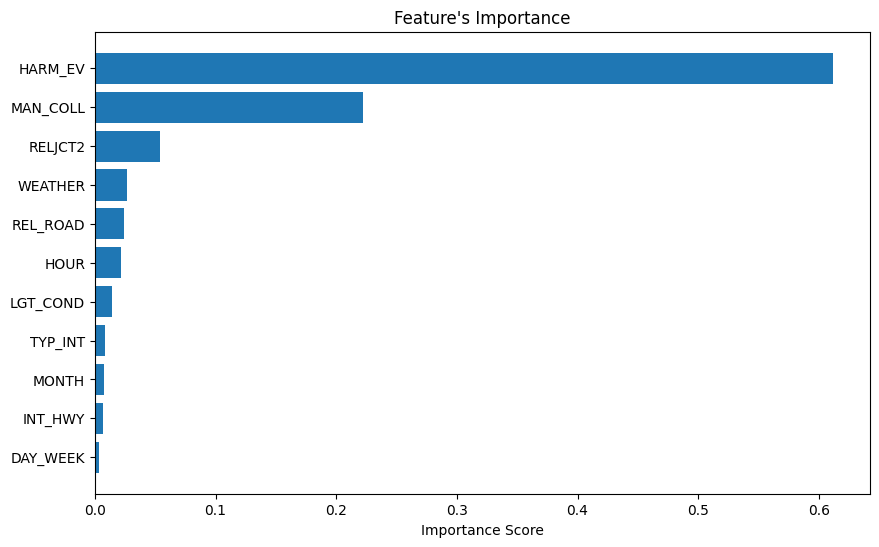

In [134]:
#Feature importance visualization
# Get feature importances from your trained decision tree
importances = dt.feature_importances_
feat_names = X_train.columns

# Put into DataFrame
feat_df = pd.DataFrame({
    "Feature": feat_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Print top features
print(feat_df.head(20))

# Plot
plt.figure(figsize=(10,6))
plt.barh(feat_df["Feature"].head(20), feat_df["Importance"])
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("Feature's Importance")
plt.show()


In [135]:
#can add anything otherthing to explore this Decsision Tree model

#### 2. Advance Method with Oversampling

In [136]:
# Basic XGBoost model (no tuning)
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Number of classes in your target (e.g., 5 for MAX_SEV 0–4)
num_classes = len(np.unique(y_train))

# ========================================
# 1. Basic XGBoost model (no tuning)
# ========================================
xgb_basic = XGBClassifier(
    objective="multi:softmax",   # directly outputs class label
    num_class=num_classes,
    eval_metric="mlogloss",      # multiclass loss
    tree_method="hist",          # fast on large datasets
    n_estimators=200,            # basic default-ish
    max_depth=None,              
    learning_rate=0.1,           # default
    subsample=1.0,               # no randomness
    colsample_bytree=1.0,        # use all features
    random_state=42,
    n_jobs=-1
)

# ========================================
# 2. Train on the training data
# ========================================
xgb_basic.fit(X_train, y_train)

# ========================================
# 3. Predict on test set
# ========================================
y_pred = xgb_basic.predict(X_test)

# ========================================
# 4. Evaluate
# ========================================
print("Basic XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Basic XGBoost Accuracy: 0.4938924466242838

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.95      0.67     37961
           1       0.34      0.06      0.11     20480
           2       0.44      0.23      0.30     15417
           3       0.32      0.13      0.19     10156
           4       0.42      0.05      0.08      2027

    accuracy                           0.49     86041
   macro avg       0.41      0.28      0.27     86041
weighted avg       0.44      0.49      0.40     86041



In [137]:
# XGBoost with RandomOverSampler to handle class imbalance
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

ros = RandomOverSampler(random_state=42)

xgb_recall = XGBClassifier(
    objective="multi:softmax",
    num_class=len(np.unique(y_train)),
    eval_metric="mlogloss",
    tree_method="hist",
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1
)

pipe = Pipeline([
    ("ros", ros),     # oversample minority
    ("xgb", xgb_recall)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.38538603688938994
              precision    recall  f1-score   support

           0       0.66      0.48      0.56     37961
           1       0.30      0.37      0.33     20480
           2       0.36      0.27      0.31     15417
           3       0.20      0.21      0.21     10156
           4       0.09      0.50      0.15      2027

    accuracy                           0.39     86041
   macro avg       0.32      0.37      0.31     86041
weighted avg       0.46      0.39      0.41     86041



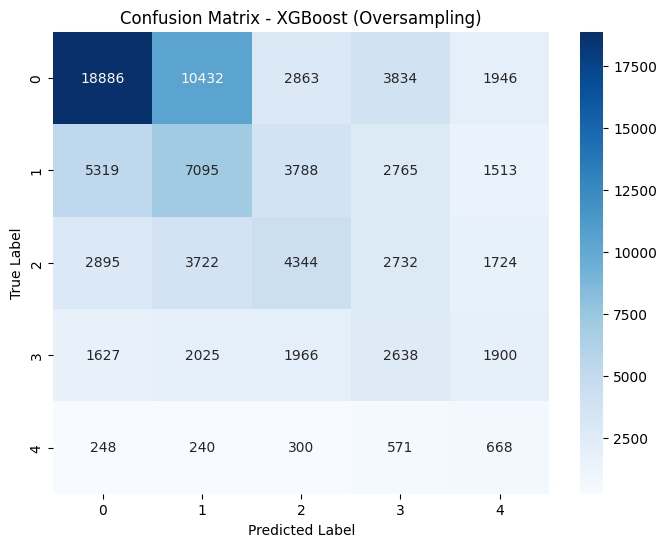

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=[0,1,2,3,4],
            yticklabels=[0,1,2,3,4])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost (Oversampling)")
plt.show()


In [140]:
# --- 1️⃣ Create binary target variable ---
# Map severity 0,1,2 -> 0 (low), and 3,4 -> 1 (high)
"""y = df['MAX_SEV'].astype(int).replace({0:0, 1:0, 2:0, 3:1, 4:1})

# --- 2️⃣ Prepare features ---
X = df.drop(columns=['MAX_SEV'])
# --- 3️⃣ Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)"""

"y = df['MAX_SEV'].astype(int).replace({0:0, 1:0, 2:0, 3:1, 4:1})\n\n# --- 2️⃣ Prepare features ---\nX = df.drop(columns=['MAX_SEV'])\n# --- 3️⃣ Train/test split ---\nX_train, X_test, y_train, y_test = train_test_split(\n    X, y, test_size=0.3, random_state=42, stratify=y\n)"

In [146]:
import numpy as np
from collections import Counter

from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# ==========================================
# 1. Recode labels: (0,1)->0; (2)->1; (3,4)->2
# ==========================================

def regroup_labels(y):
    """
    y can be a pandas Series or numpy array with original labels {0,1,2,3,4}.
    Returns array with new labels {0,1,2}.
    """
    mapping = {0: 0, 1: 0, 2: 1, 3: 2, 4: 2}
    if hasattr(y, "map"):  # pandas Series
        return y.map(mapping).values
    else:  # numpy array
        return np.vectorize(mapping.get)(y)

y_train_grp = regroup_labels(y_train)
y_test_grp  = regroup_labels(y_test)

print("Grouped y_train distribution:", Counter(y_train_grp))
print("Grouped y_test  distribution:", Counter(y_test_grp))

# ==========================================
# 2. Build pipeline: RandomOverSampler + XGBoost
# ==========================================

ros = RandomOverSampler(
    sampling_strategy={0: 136362, 1: 200000, 2: 200000},
    random_state=42
)

num_classes = len(np.unique(y_train_grp))

xgb_basic = XGBClassifier(
    objective="multi:softmax",
    num_class=num_classes,
    eval_metric="mlogloss",
    tree_method="hist",
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

pipe = Pipeline([
    ("ros", ros),
    ("xgb", xgb_basic)
])

# ==========================================
# 3. Fit on training data (with oversampling)
# ==========================================

pipe.fit(X_train, y_train_grp)

# ==========================================
# 4. Evaluate on test set
# ==========================================

y_pred_grp = pipe.predict(X_test)

print("Accuracy (3-class, grouped):", accuracy_score(y_test_grp, y_pred_grp))
print("\nClassification report (3-class, grouped):")
print(classification_report(y_test_grp, y_pred_grp, target_names=[
    "Low (0-1)",   # new class 0
    "Medium (2)",  # new class 1
    "High (3-4)"   # new class 2
]))


Grouped y_train distribution: Counter({0: 136362, 1: 35972, 2: 28428})
Grouped y_test  distribution: Counter({0: 58441, 1: 15417, 2: 12183})
Accuracy (3-class, grouped): 0.5003544821654793

Classification report (3-class, grouped):
              precision    recall  f1-score   support

   Low (0-1)       0.85      0.50      0.63     58441
  Medium (2)       0.26      0.45      0.33     15417
  High (3-4)       0.27      0.55      0.36     12183

    accuracy                           0.50     86041
   macro avg       0.46      0.50      0.44     86041
weighted avg       0.67      0.50      0.54     86041

